In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
def generator_ar_1(sigma_epsilon_square=2, sigma_eta_square=0.02, phi=0.975, mu=0.5, T=5000, seed=2345):
    np.random.seed(seed=seed)
    x = 0
    ys = np.zeros(T)
    for i in range(T):
        ys[i] = x + np.random.randn(1) * np.sqrt(sigma_epsilon_square)
        x = (x - mu) * phi + mu + np.random.randn(1) * \
            np.sqrt(sigma_eta_square)
    print('sample generated with success !')
    return ys

# Expectation

In [41]:
def compute_alpha_t(y, t, ct, mu_alpha, sigma2_alpha, A, b, sigma2_eta, sigma2_epi):
    '''All sigma are squared: sigma2 == variance'''
    if t == 0:
        ct[0] = norm.pdf(y, loc=0, scale=np.sqrt(sigma2_epi))
    if t == 1:
        denom = sigma2_eta + sigma2_epi
        mu_alpha[1] = (y * sigma2_eta + sigma2_epi * b) / denom
        sigma2_alpha[1] = sigma2_eta * sigma2_epi / denom
        ct[1] = norm.pdf(y, loc=b, scale=np.sqrt(denom))
    else:
        sigma2_tmp = sigma2_eta + A * A * sigma2_alpha[t-1]
        denom = sigma2_tmp + sigma2_epi
        nom = sigma2_tmp * y + sigma2_epi * (A * mu_alpha[t-1] + b)
        mu_alpha[t] = nom / denom
        sigma2_alpha[t] = sigma2_epi * sigma2_tmp / denom
        ct[t] = norm.pdf(y, loc=A*mu_alpha[t-1]+b, scale=np.sqrt(denom))
    return

def compute_alpha_hat(ys, A, b, sigma2_eta, sigma2_epi):
    Y = np.array(ys)
    T = Y.shape[0]
    mu_alpha = np.zeros(T)
    sigma2_alpha = np.zeros(T)
    ct = np.zeros(T)
    for t in range(T):
        compute_alpha_t(Y[t], t, ct, mu_alpha, sigma2_alpha, A, b, sigma2_eta, sigma2_epi)
    return mu_alpha, sigma2_alpha, ct

def compute_log_likelihood(ct):
    return np.sum(np.log(ct)) 

In [44]:
# parameters
sigma_epsilon_square_0 = 2
sigma_eta_square_0 = 0.02
phi_0 = 0.975
mu_0 = 0.5


# T = 5000
# N = 3500
T = 5000
N = 600
observations = generator_ar_1(sigma_epsilon_square=sigma_epsilon_square_0,
                              sigma_eta_square=sigma_eta_square_0, phi=phi_0, mu=mu_0, T=T)

sample generated with success !


In [47]:
mus = [i*0.03 for i in range(10,30)]

log_likelihoods = []
for mu in mus:
    A = phi_0
    b = (1 - phi_0) * mu
    _, _, ct = compute_alpha_hat(ys=observations, 
                                 A=A, 
                                 b=b, 
                                 sigma2_eta=sigma_epsilon_square_0, 
                                 sigma2_epi=sigma_epsilon_square_0)
    log_lkh = compute_log_likelihood(ct)
    print('mu=', '%0.2f' % (mu), ' log-lokelihood=', log_lkh)
    log_likelihoods.append(log_lkh)

mu= 0.30  log-lokelihood= -10090.812066
mu= 0.33  log-lokelihood= -10090.803108
mu= 0.36  log-lokelihood= -10090.795555
mu= 0.39  log-lokelihood= -10090.7894072
mu= 0.42  log-lokelihood= -10090.7846643
mu= 0.45  log-lokelihood= -10090.7813266
mu= 0.48  log-lokelihood= -10090.7793939
mu= 0.51  log-lokelihood= -10090.7788662
mu= 0.54  log-lokelihood= -10090.7797436
mu= 0.57  log-lokelihood= -10090.782026
mu= 0.60  log-lokelihood= -10090.7857135
mu= 0.63  log-lokelihood= -10090.7908061
mu= 0.66  log-lokelihood= -10090.7973037
mu= 0.69  log-lokelihood= -10090.8052064
mu= 0.72  log-lokelihood= -10090.8145141
mu= 0.75  log-lokelihood= -10090.8252268
mu= 0.78  log-lokelihood= -10090.8373447
mu= 0.81  log-lokelihood= -10090.8508675
mu= 0.84  log-lokelihood= -10090.8657955
mu= 0.87  log-lokelihood= -10090.8821285


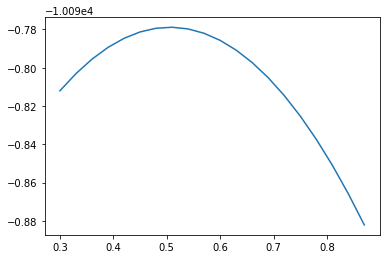

In [48]:
plt.figure()
plt.plot(mus, log_likelihoods)
plt.show()